<a href="https://colab.research.google.com/github/namanpundir/WisconsinDiagnosticBreastCancer/blob/main/Pundir_Naman_proj1code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To classify suspected FNA cells to Benign (class 0) or Malignant (class 1) using SGD Classifier.
#Dataset: Wisconsin Diagnostic Breast Cancer (wdbc.dataset)
The dataset contains 569 instances with 32 attributes.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt #for graphical representation of the data
import pandas as pd #for Dataset pre processing

In [ ]:
from google.colab import files #to upload dataset in google colab
uploaded = files.upload()
#import os       ( for Jupyter notebook or others )
#print(os.listdir("../input"))
#dataset = pd.read_csv('../input/wdbc.csv')

In [ ]:
dataset = pd.read_csv('wdbc.csv') #reading and loading of the dataset with the help of panda 
dataset.tail() #Display the last 5 rows of the dataset to check the reading of the dataset.

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
print("Dimensions of the Data Set(Instances,Features) : {}".format(dataset.shape)) #to check dimension fo the data set


Dimensions of the Data Set(Instances,Features) : (569, 32)


In [ ]:
str_to_int = {'M':1, 'B':0} #M (Malignant) and Diagnosis = B (Benign)
dataset['F2'] = dataset['F2'].map(str_to_int) #Every entry should be numerical so changing M with 1 and B with 0.
dataset #Dataset with all numerical entry especially Coloumn 2.

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X = dataset.loc[:,list(dataset.columns[2:31])] #defining X
Y = dataset.loc[:, 'F2'] #defining Y 
Y=Y.astype('int') #Since no non-numeirc value is acceptable

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import time

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) #train and test split with 20% test data and 80% train data.

accuracy_all = []
cvs_all = []

In [ ]:

from sklearn.linear_model import SGDClassifier  #Stochastic Gradient Descent (SGD) Classifier
start = time.time()
clf = SGDClassifier() #The classifier clf is initialized
clf.fit(X_train, Y_train) #The classifier clf is fitted with the train data set X_train and y_train


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction = clf.predict(X_test) #prediction

In [ ]:
scores = cross_val_score(clf, X, y, cv=5) #to calculate score
end = time.time() 
accuracy_all.append(accuracy_score(prediction, Y_test)) #to calculate accuracy %
cvs_all.append(np.mean(scores))


In [ ]:
print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, Y_test)))

SGD Classifier Accuracy: 92.98%


In [ ]:
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Cross validation score: 88.23% (+/- 9.71%)


In [ ]:
from sklearn.metrics import confusion_matrix #confusion matrix to calculate accuracy of the system
confusionmatrix = confusion_matrix(Y_test, prediction)
print(confusionmatrix)
print()

[[71  0]
 [ 8 35]]



In [ ]:
clf.score(X_train, Y_train) #training classification accuracy

0.9142857142857143

In [ ]:
from sklearn.metrics import precision_score #tells about the ability of the classifier
print("SGD Precision Score: {0:.2%}".format(precision_score(prediction, Y_test)))

SGD Precision Score: 81.40%


In [ ]:
from sklearn.metrics import recall_score #recall is intuitively the ability of the classifier to find all the positive samples.
recall = recall_score(Y_test, prediction, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.814


In [ ]:
from sklearn.model_selection import cross_val_score #Cross_val_score returns a score of the test fold
from sklearn.model_selection import cross_val_predict #cross_val_predict returns predicted y values for the test fold. 
Y_pred = cross_val_predict(clf, X, Y, cv=3)
print(Y_pred) #this is for each input
print(cross_val_score(clf, X, Y, cv=3)) #aveages of the output

[1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 0 1 1 1 1 1 1 1 

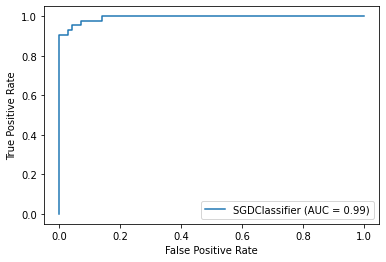

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve #summarize the performance of the classifier in positive class.
metrics.plot_roc_curve(clf, X_test, Y_test)
plt.show() #to show to graphical representation